In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('C:\\Users\\rushikesh\\Downloads\\SMSSpamCollection.txt', sep = '\t', 
                 names= ['label','text'])

In [17]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.shape

(5572, 2)

In [21]:
!pip install nltk

In [23]:
import nltk

In [45]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rushikesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rushikesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
sent = 'Hello friends! How are you?'

In [37]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [43]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [49]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [51]:
clean

['Hello', 'friends', '!', 'How', '?']

In [53]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent)
         if word not in swords]

In [55]:
clean

['hello', 'friend', '!', 'how', '?']

In [79]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens
             if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word)for word in clean
             if word not in swords]
    return clean

In [81]:
clean_text(sent)

['hello', 'friend', 'how']

In [85]:
# pre processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [89]:
x = df['text']
y = df['label']

In [93]:
x_new = tfidf.fit_transform(x)

In [95]:
x.shape

(5572,)

In [97]:
x_new.shape

(5572, 6513)

In [99]:
x_new

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52578 stored elements in Compressed Sparse Row format>

In [101]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [107]:
# cross validation 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y, random_state=0, test_size=0.25)

In [109]:
x_train.shape

(4179, 6513)

In [111]:
x_test.shape

(1393, 6513)

In [113]:
from sklearn.naive_bayes import GaussianNB

In [117]:
nb = GaussianNB()

In [119]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [121]:
y_pred = nb.predict(x_test.toarray())

In [125]:
y_test.value_counts()

label
ham     1208
spam     185
Name: count, dtype: int64

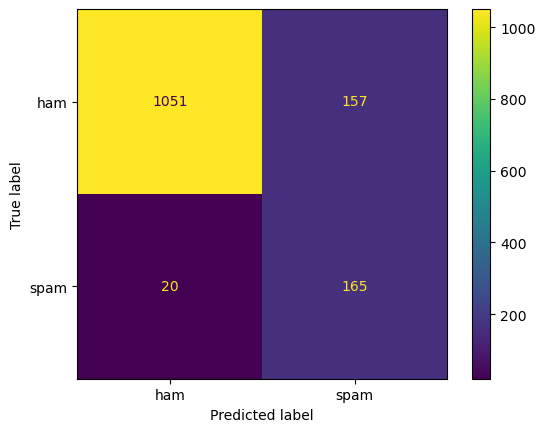

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [131]:
from sklearn.metrics import accuracy_score, classification_report

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [137]:
accuracy_score(y_test, y_pred)

0.8729361091170137

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf = RandomForestClassifier(random_state=0)

In [145]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [149]:
y_pred = rf.predict(x_test)

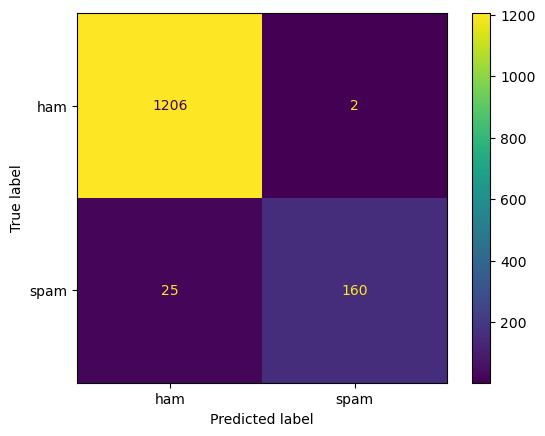

In [151]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [157]:
accuracy_score(y_test, y_pred)

0.9806173725771715

In [159]:
# hyper parameter tuning

In [161]:
from sklearn.model_selection import GridSearchCV

In [181]:
param = {
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'random_state':[0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}

In [183]:
grid = GridSearchCV(rf, param_grid=param, cv=5, scoring ='accuracy')

In [185]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [195]:
rf = grid.best_estimator_

In [197]:
y_pred = rf.predict(x_test)

In [199]:
accuracy_score(y_test, y_pred)

0.9777458722182341